# Домашнее задание 5

В этом задании предлагается поближе познакомиться с `решающими деревьями` и `случайными лесами`, а также поучаствовать в соревновании **House Prices: Advanced Regression Techniques**

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 25 апреля 23:59**

при составлении ДЗ использованы материалы кафедры **АТП**

## Теоретическая часть
#### 1.5 балла

1. Что такое решающее дерево? Почему так называется?
2. В чем основная идея этого алгоритма?
3. Что такое решающее правило?
4. Что можно сказать про проблему переобучения для решающих деревьев?
5. Что такое отбор признаков по feature_importance? 
6. Что такое PCA?

Ответы:
1. Модель, представляющая из себя нециклический граф - дерево, в узлах которого находятся условия, а в листьях - классы.
2. Объект, продоходя от корня к листям, сравнивет своё значение свойства с условием, находящимся в текущей вершине. В зависимости от того, подходит ли это значение, выбирается ребро, по которому дальше будет спускаться объект. Как только он попадёт в лист, определится его класс.
3. Это условие, находящееся в одной из вершин дерева.
4. Она существует, и ее нужно решать. Например, можно ограничить глубину дерева.
5. Метод, оставляющий наиболее важные признак. Они определяются, например, кросс-валидацией.
6. Это метод сжатия данных, с минимальной потерей информации.

## Практическая чать 1. Решающие деревья
#### 3.5 балла
Здесь предлагается использовать решающие деревья для того, чтобы поработать с датасетом, в котором содержится информация о картинках с ядовитыми и съедобными грибами: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# считайте данные из датасета при помощи функции read_csv:
df = pd.read_csv('mushrooms.csv')

In [2]:
# проверьте, что в датасете нет пустых строк:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [3]:
from sklearn.model_selection import train_test_split


# Разбейте данные на тестовую и тренировочную части
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
# Посмотрите на информацию о данных. Что вы можете сказать о них? 
x.info()
y.info()
x.dtypes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


Займемся отбором параметров. Используем кросс-валидацию

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = tree.DecisionTreeClassifier()# передайте сюда классификатор (решающее дерево)
gsearch = GridSearchCV(tr, parameters)
q=gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
gsearch.cv_results_
scores = cross_val_score(model, X_train, y_train)

model.fit(X_train, y_train)
print(gsearch)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('gini', 'entropy'), 'min_samples_split': [2, 3, 4, 5], 'max_depth': [9, 10, 11, 12], 'class_weight': ('balanced', None), 'presort': (False, True)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


 Выведите `gsearch`. Что вы можете сказать об этом? Что это и зачем нужно?

In [5]:
# Посчитайте скор
score = model.score(X_test, y_test)
score

1.0

Давайте посмотрим, как же устроено наше дерево? Сделать можно это с помощью следующего кода: 

P.S. возможно, что вам придется установить библиотеку `graphviz`. Устанавливается она точно также, как и любая другая бибилиотека.

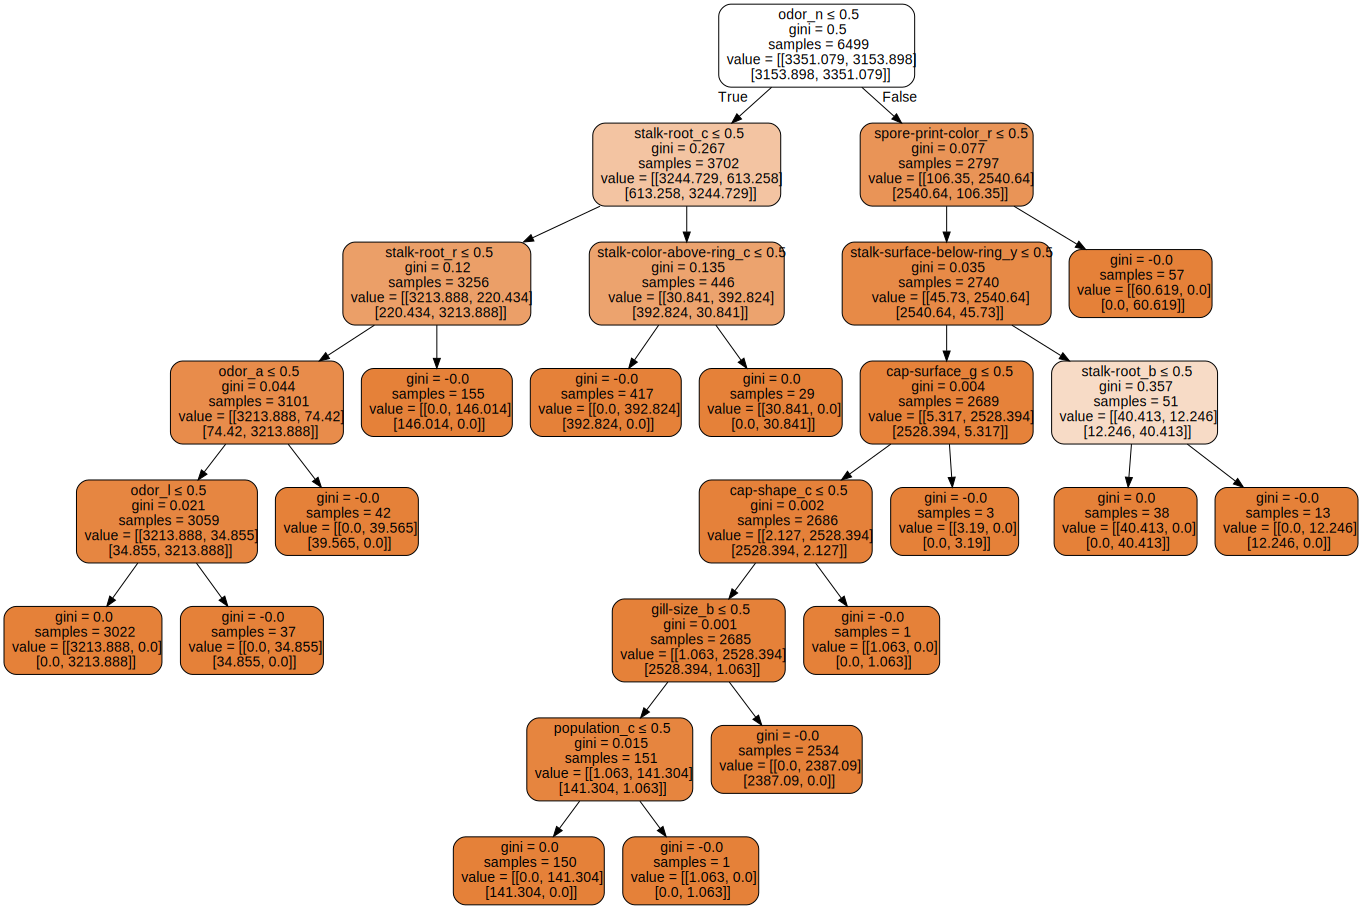

In [6]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

Какие выводы вы можете сделать об устройстве решающего дерева?


## Практическая часть 2. Случайные леса.
### 2 балла
В этой части задания мы будем работать с датасетом https://www.kaggle.com/c/house-prices-advanced-regression-techniques c `kaggle`.

Предложенный код можно использовать как угодно -- если вам удобнее написать все свое, можете все удалить

In [7]:
%matplotlib inline

In [8]:
# скачайте данные train и test при помощи функции read_csv 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
# выведите названия столбцов. 
# Предположите, какие из них могут быть важны, исходя из вашего жизненного опыта и интуиции?
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

выделим необходимые данные:

In [10]:
labels = train.SalePrice

In [11]:
labels.head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

Постройте график распределения цен на жилье. Какое распределение оно вам напоминает?

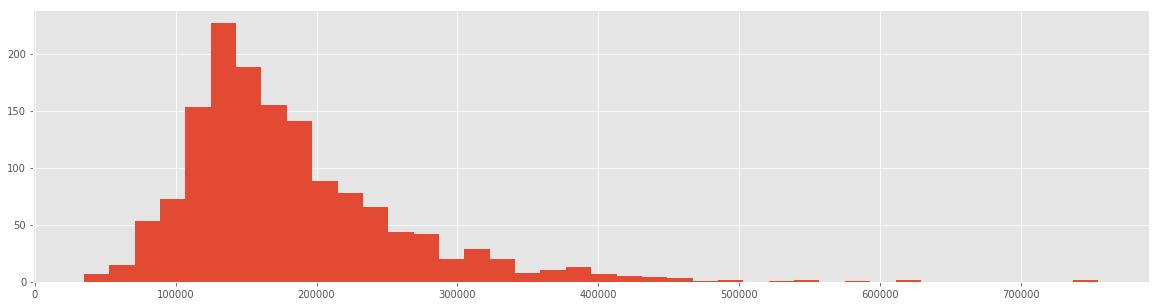

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.hist(train['SalePrice'],bins=40)
plt.show()

In [13]:
# выведите данные
print(train.shape)


(1460, 81)


Cоздадим датасет и назовем его `all` из конкатенации train, test.

P.S. Если будете использовать функцию `concat`, не забудьте установить `axis`=0

In [14]:
all = pd.concat([train, test], axis=0)

Заменим пустые данные `null` на средние значения и отформатируем данные:

In [15]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
Id             	0.00	1460
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
Ce

Используйте известные вам методы для отбора признаков. Удалите ненужные признаки.
Не забудьте нормализовать (оцифровать) данные!

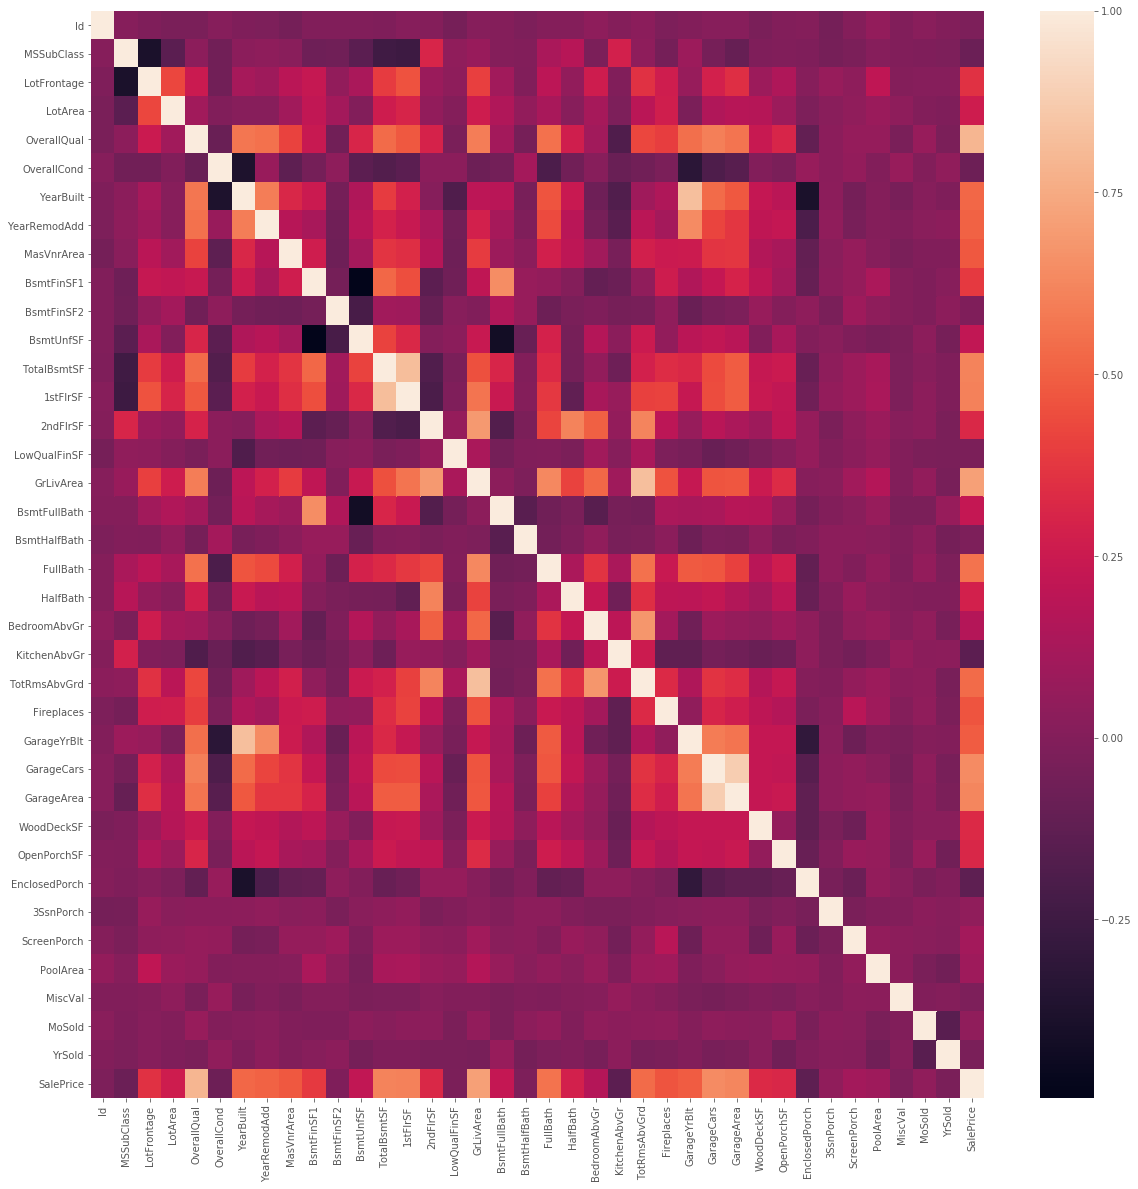

In [16]:
import seaborn
plt.subplots(figsize=(20,20))
plt.show(seaborn.heatmap(train.corr())) 

In [17]:
# some useless features
train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [19]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    train[col].fillna('none', inplace=True)
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,NaN,none,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,NaN,none,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,NaN,none,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,NaN,none,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,NaN,none,NaN,0,12,2008,WD,Normal,250000


Визуализируем данные:

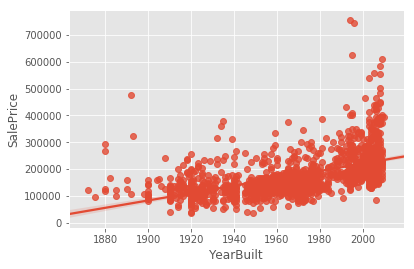

In [21]:
seaborn.regplot(train["YearBuilt"], labels)

Что можно сказать о таком распределении данных?

'\nA\tAgriculture\nC\tCommercial\nFV\tFloating Village Residential\nI\tIndustrial\nRH\tResidential High Density\nRL\tResidential Low Density\nRP\tResidential Low Density Park \nRM\tResidential Medium Density\n'

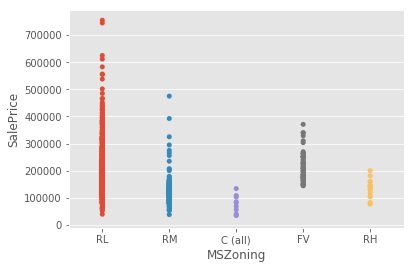

In [22]:
seaborn.stripplot(train["MSZoning"], labels)
"""
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density
"""

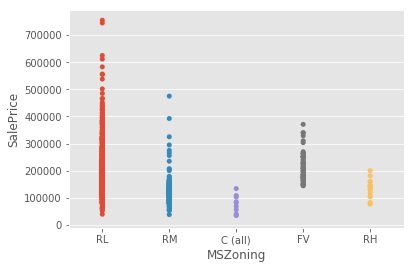

In [23]:
seaborn.stripplot(train["MSZoning"], labels)

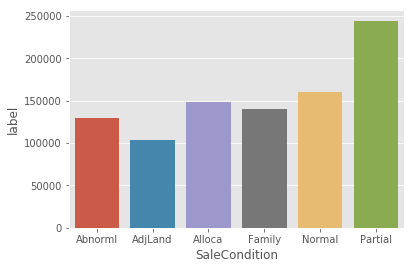

In [24]:
group_col = "SaleCondition"

train_with_labels = train.copy()
train_with_labels["label"] = labels
groupped = train_with_labels.groupby(group_col).median().reset_index()[[group_col, "label"]]
seaborn.barplot(groupped[group_col], groupped.label)

In [25]:
categorial = ['OverallQual', 'YearBuilt', 'YearRemodAdd',  'TotalBsmtSF',
'1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea']
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

In [26]:
from sklearn.feature_extraction import DictVectorizer
 
#  энкодер, которым Вы можете воспользоваться
def encode_onehot(df, cols):

    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict('records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



In [27]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=0)

In [28]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,854,0,-1,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,0,0,AllPub,0,0,0,2008
1,1,0,0,-1,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,1,1,AllPub,298,1,1,2007
2,2,866,0,-1,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,1,2,AllPub,0,2,2,2008
3,3,756,0,-1,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,2,3,AllPub,0,3,3,2006
4,4,1053,0,-1,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,3,4,AllPub,192,4,4,2008


In [29]:
encode_onehot(train[categorial],categorial).head()

,1stFlrSF,FullBath,GarageArea,GrLivArea,KitchenAbvGr,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,2.0,0.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,2.0
3,3.0,1.0,3.0,3.0,0.0,0.0,2.0,3.0,3.0,3.0
4,4.0,0.0,4.0,4.0,0.0,2.0,3.0,4.0,4.0,4.0


In [30]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

to_encode = categorial#отобранные фичи
df = train
for column in to_encode:
    le = LabelEncoder()
    df.loc[:,column] = le.fit_transform(df.loc[:,column])


#df = test
#for column in to_encode:
#    le = LabelEncoder()
#    df.loc[:,column] = le.fit_transform(df.loc[:,column])
#test.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,854,0,-1,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,0,0,AllPub,0,0,0,2008
1,1,0,0,-1,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,1,1,AllPub,298,1,1,2007
2,2,866,0,-1,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,1,2,AllPub,0,2,2,2008
3,3,756,0,-1,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,2,3,AllPub,0,3,3,2006
4,4,1053,0,-1,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,3,4,AllPub,192,4,4,2008


### Функция для формирования посылки в `kaggle`

In [32]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

In [33]:
test[list(set(train.columns) - {'SalePrice'})]._get_numeric_data().head()

,Id,GarageCars,TotRmsAbvGrd,BsmtHalfBath,OpenPorchSF,ScreenPorch,GarageYrBlt,BsmtFinSF2,1stFlrSF,BedroomAbvGr,...,LotFrontage,MiscVal,3SsnPorch,HalfBath,LowQualFinSF,OverallCond,PoolArea,YrSold,YearBuilt,MasVnrArea
0,1461,1.0,4,0.0,0,120,1961.0,144.0,132,2,...,80.0,0,0,0,0,6,0,2010,53,0.0
1,1462,1.0,1,0.0,36,0,1958.0,0.0,753,3,...,81.0,12500,0,1,0,6,0,2010,18,108.0
2,1463,2.0,1,0.0,34,0,1997.0,0.0,124,3,...,74.0,0,0,1,0,5,0,2010,35,0.0
3,1464,2.0,2,0.0,36,0,1998.0,0.0,216,3,...,78.0,0,0,1,0,6,0,2010,45,20.0
4,1465,2.0,4,0.0,82,144,1992.0,0.0,754,2,...,43.0,0,0,0,0,5,0,2010,86,0.0


In [34]:
train[list(set(train.columns) - {'SalePrice'})]._get_numeric_data().head()

,Id,GarageCars,TotRmsAbvGrd,BsmtHalfBath,OpenPorchSF,ScreenPorch,GarageYrBlt,BsmtFinSF2,1stFlrSF,BedroomAbvGr,...,LotFrontage,MiscVal,3SsnPorch,HalfBath,LowQualFinSF,OverallCond,PoolArea,YrSold,YearBuilt,MasVnrArea
0,1,2.0,0,0.0,61,0,2003.0,0.0,0,3,...,65.0,0,0,1,0,5,0,2008,0,196.0
1,2,2.0,1,1.0,0,0,1976.0,0.0,1,3,...,80.0,0,0,0,0,8,0,2007,1,0.0
2,3,2.0,1,0.0,42,0,2001.0,0.0,2,3,...,68.0,0,0,1,0,5,0,2008,2,162.0
3,4,3.0,2,0.0,35,0,1998.0,0.0,3,3,...,60.0,0,0,0,0,5,0,2006,3,0.0
4,5,3.0,3,0.0,84,0,2000.0,0.0,4,4,...,84.0,0,0,1,0,5,0,2008,4,350.0


In [35]:
from sklearn.ensemble import RandomForestClassifier
train = encode_onehot(train,categorial)
test =  encode_onehot(test,categorial)
clf = RandomForestClassifier()
clf.fit(train[list(set(train.columns) - {'SalePrice'})]._get_numeric_data(),train['SalePrice'])
preds = clf.predict(test[list(set(train.columns) - {'SalePrice'})]._get_numeric_data())
submit(preds)

In [36]:
def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

In [37]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        self.encoding = X_copy.groupby(col)['target'].mean()
        return self
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)



def code_mean(train, test, labels, col, cv):
    mean_encoder = MeanEncoder(col)
    train_col = cross_val_predict(mean_encoder, train, labels, cv=cv)
    test_col = mean_encoder.fit(train, labels).predict(test)
    
    return train_col, test_col

Какой скор вам удалось получить? Как вы считаете, результат хороший или не очень?

Скор  = 0.42404. Ну так как он попал в Top 96%, он не так плох.

## Практическая часть 3. Cлучайные леса.

#### 3 балла
Подумайте, какие образом можно улучшить скор?

Вот идеи:
1. Попробовать подобрать нужные параметры. Для этого можно исследовать данные, посмотреть, как они распределены и что важно, а что -- не очень
2. Найти, какие категориальные признаки являются ординальными и закодировать их соответственно
3. Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
4. Сгенерировать новые признаки
